In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 109.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 170MB/s]



image 1/1 /content/g.jpg: 384x640 5 bottles, 81.7ms
Speed: 17.5ms preprocess, 81.7ms inference, 429.4ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /content/g.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 297.0ms
Speed: 9.6ms preprocess, 297.0ms inference, 55.0ms postprocess per image at shape (1, 3, 1024, 1024)
Results saved to runs/segment/predict


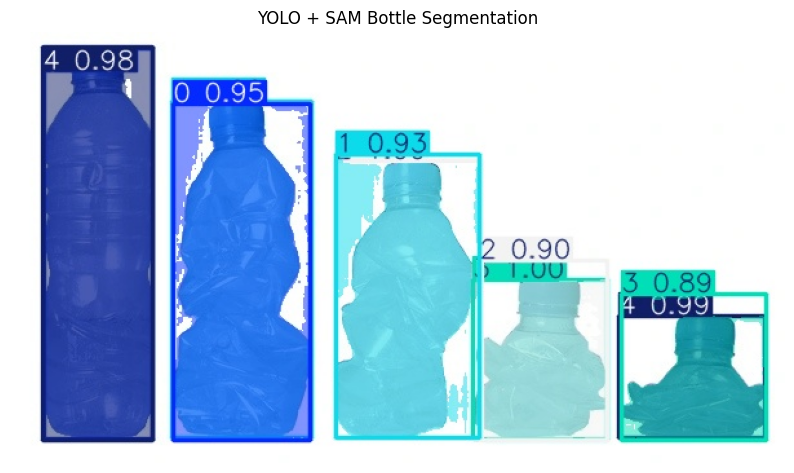

In [3]:
from ultralytics import YOLO, SAM
import cv2
import matplotlib.pyplot as plt
import os
import glob

# Load models
yolo_model = YOLO("bestest.pt")
sam_model = SAM("mobile_sam.pt")

# Input image path
image_path = "g.jpg"

# Run YOLO object detection
results = yolo_model(image_path)

# Filter only 'bottle' class (class ID = 0)
bottle_class_id = 0
bottle_boxes = []
for r in results:
    for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
        if int(cls) == bottle_class_id:
            bottle_boxes.append(box.tolist())

# Run SAM
if bottle_boxes:
    sam_model.predict(
        image_path,
        bboxes=bottle_boxes,
        save=True  # Output goes to runs/segment/predictX/
    )

    # Get the latest SAM output folder
    segment_dirs = sorted(glob.glob("runs/segment/predict*"), key=os.path.getmtime)
    if segment_dirs:
        latest_dir = segment_dirs[-1]
        output_img_path = os.path.join(latest_dir, os.path.basename(image_path))

        if os.path.exists(output_img_path):
            # Read and show using matplotlib
            segmented_image = cv2.imread(output_img_path)
            segmented_image_rgb = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)

            plt.figure(figsize=(10, 8))
            plt.imshow(segmented_image_rgb)
            plt.axis('off')
            plt.title("YOLO + SAM Bottle Segmentation")
            plt.show()
        else:
            print(f"❌ Image not found in {latest_dir}")
    else:
        print("❌ No SAM output directories found.")
else:
    print("No bottles detected.")
